<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/%EC%84%9C%EC%B4%88%EA%B5%AC_%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%9C%84%EC%B9%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고: https://thlee33.medium.com/geopandas-%EA%B8%B0%EC%B4%88-fe1feecd2ab4

In [7]:
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

In [17]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.4 MB/s 
     |████████████████████████████████| 15.4 MB 64 kB/s 
     |████████████████████████████████| 6.6 MB 54.9 MB/s 


In [18]:
import geopandas as gpd 
import fiona #공간데이터를 딕셔너리 형태 등으로 접근 할 수 있는 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#따릉이 대여소 정보
station=pd.read_csv('/content/drive/MyDrive/따릉이 project/공공자전거 대여소 정보(21.01.31 기준).csv',encoding='cp949',skiprows=5,header=None)

In [2]:
#station columns rename
station= station.rename(columns= {0: 'stno', 1: 'stname',2: 'place',3:'detailedplace',4:'Lat',5:'Long',6:'Time',7:'LCD',8:'QR',9:'method'})

In [21]:
#서초구 데이터 뽑아오기
seocho= station[station.place=='서초구'][['place','detailedplace','Lat','Long']].dropna()

In [23]:
seocho

,place,detailedplace,Lat,Long
1697,서초구,서울특별시 서초구 본마을2길 2,37.453281,127.051483
1698,서초구,서울특별시 서초구 청계산로 지하 179,37.448936,127.054375
1699,서초구,서울특별시 서초구 청계산로 지하 179,37.447659,127.055016
1700,서초구,서울특별시 서초구 청계산로9길 76,37.453751,127.059380
1701,서초구,서울특별시 서초구 헌릉로8길 42,37.454357,127.062103
...,...,...,...,...
1810,서초구,서초구 사평대로 108,37.498455,126.996643
1811,서초구,청계산로 434,37.430977,127.070335
1812,서초구,서초구 강남대로 479,37.505089,127.023911
1813,서초구,서초구 동작대로 164,37.491264,126.982956


In [24]:
#가공된 데이터 좌표를 이용해서 공간데이터 프레임으로 변환
geom_seocho= gpd.points_from_xy(seocho.Long, seocho.Lat)

In [25]:
#좌표계 정의
import pyproj
from fiona.crs import from_epsg

columns=['place','detailedplace']
gdf_seocho=gpd.GeoDataFrame(seocho[columns],
                            geometry= geom_seocho,
                            crs= from_epsg(4326))
gdf_seocho.head()

,place,detailedplace,geometry
1697,서초구,서울특별시 서초구 본마을2길 2,POINT (127.05148 37.45328)
1698,서초구,서울특별시 서초구 청계산로 지하 179,POINT (127.05437 37.44894)
1699,서초구,서울특별시 서초구 청계산로 지하 179,POINT (127.05502 37.44766)
1700,서초구,서울특별시 서초구 청계산로9길 76,POINT (127.05938 37.45375)
1701,서초구,서울특별시 서초구 헌릉로8길 42,POINT (127.06210 37.45436)


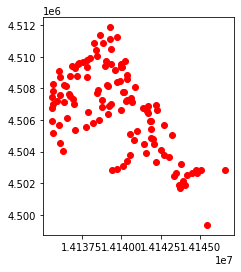

In [28]:
#to_crs 이용해서 epsg:3857로 변환
gdf_seocho2= gdf_seocho.to_crs(epsg=3857)
gdf_seocho2.plot(color='red')

In [30]:
#가공된 공간데이터를 geojson으로 저장
gdf_seocho2.to_file('seocho.geojson',driver='GeoJSON')

In [32]:
gdf_admin_gu_pg = gpd.read_file('/content/drive/MyDrive/따릉이 project/follium/TL_SCCO_SIG.shp', encoding='euc-kr')
gdf_admin_gu_pg.crs

<Projected CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...>
Name: PCS_ITRF2000_TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
gdf_admin_gu_pg.crs = "epsg:5179"
gdf_admin_gu_pg.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
gdf_admin_gu_pg2 = gdf_admin_gu_pg.to_crs(epsg=3857)  #좌표계를 3857로 변환

In [35]:
gdf_admin_gu_pg2['SIG_CD'] = gdf_admin_gu_pg2['SIG_CD'].astype(str)

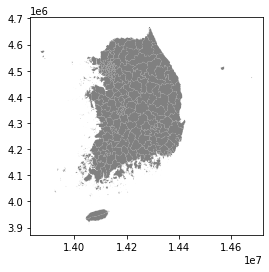

In [36]:
gdf_admin_gu_pg2.plot(color='grey')

In [37]:
gdf_admin_gu_pg2['DO'] = gdf_admin_gu_pg2['SIG_CD'].str.slice(start=0, stop=2) 
gdf_admin_gu_pg3 = gdf_admin_gu_pg2[gdf_admin_gu_pg2['DO'].str.contains('11')==True]  
gdf_admin_gu_pg3.info()
gdf_admin_gu_pg3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 140 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      25 non-null     object  
 1   SIG_ENG_NM  25 non-null     object  
 2   SIG_KOR_NM  25 non-null     object  
 3   geometry    25 non-null     geometry
 4   DO          25 non-null     object  
dtypes: geometry(1), object(4)
memory usage: 1.2+ KB


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO
140,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2...",11
141,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5...",11
142,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5...",11
143,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9...",11
144,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.587 4519195.233, 14148956.4...",11


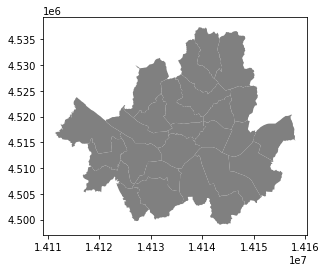

In [38]:
gdf_admin_gu_pg3.plot(color='grey')

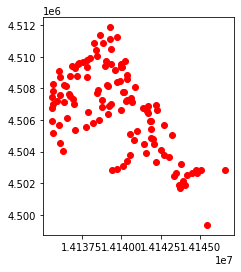

In [41]:
gdf_admin_gu_pg3['dummy'] = 'dummy'  #서울시 구별 폴리곤에 더미 컬럼 추가
geom = gdf_admin_gu_pg3.dissolve(by='dummy').geometry[0]  # '더미'값으로 디졸브한 서울시 영역
gdf_seocho3 = gdf_seocho2[gdf_seocho2.within(geom)]
gdf_seocho3.plot(color='red')